In [13]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [14]:
X=np.load("X.npy")
Y=np.load("Y.npy")

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [16]:
input_size = 100
hidden_size = 200
num_classes = 500
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [17]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [18]:
model = Net(input_size,hidden_size,num_classes)
model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
epochs = 100

In [20]:
# test
losses=[]
for epoch in range(epochs):
    
    epoch +=1
    
    for x,y in zip(X_train,Y_train):
        y=np.array([y])
        x=torch.from_numpy(np.expand_dims(x, axis=0))
        y=torch.from_numpy(y)
        
        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))
        
        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        
            
        loss = criterion(outputs, labels)
        

        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.4962262511253357
epoch 2, loss 0.37528538703918457
epoch 3, loss 0.3172612190246582
epoch 4, loss 0.2573204040527344
epoch 5, loss 0.2863197326660156
epoch 6, loss 0.2619190216064453
epoch 7, loss 0.3327159881591797
epoch 8, loss 0.23290443420410156
epoch 9, loss 0.27092933654785156
epoch 10, loss 0.15468597412109375
epoch 11, loss 0.22345733642578125
epoch 12, loss 0.1246185302734375
epoch 13, loss 0.3100929260253906
epoch 14, loss 0.24638748168945312
epoch 15, loss 0.1181793212890625
epoch 16, loss 0.14217376708984375
epoch 17, loss 0.11914825439453125


KeyboardInterrupt: 

In [26]:
# FOR ENTIRE MODEL
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

In [27]:
correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        correct+=1

print("The train accuracy is {}".format((correct/total_train_compounds)*100))

The train accuracy is 90.80381471389646


# Testing 

In [23]:
# FOR ENTIRE MODEL
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

In [28]:
# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The train accuracy is {}".format((test_correct/total_test_compounds)*100))

The train accuracy is 67.2782874617737


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

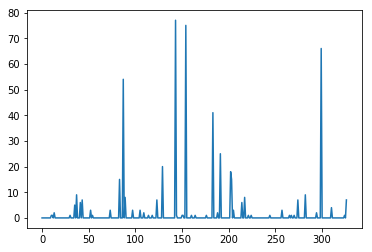

In [33]:
plt.plot(Y_test_pred)

In [34]:
## For the test dataset

In [38]:
model_pred=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 88.44621513944223


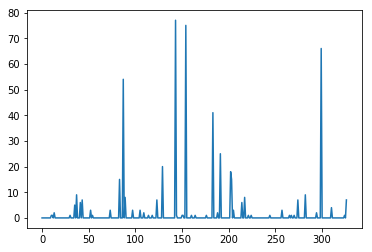

In [36]:
plt.plot(Y_pred)

In [39]:
torch.save(model.state_dict(),"Classification using DNN-Final.pytorch")